In [6]:
import pandas as pd

In [8]:
df = pd.read_csv("Insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


✅ Dataset loaded successfully!

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1 

🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


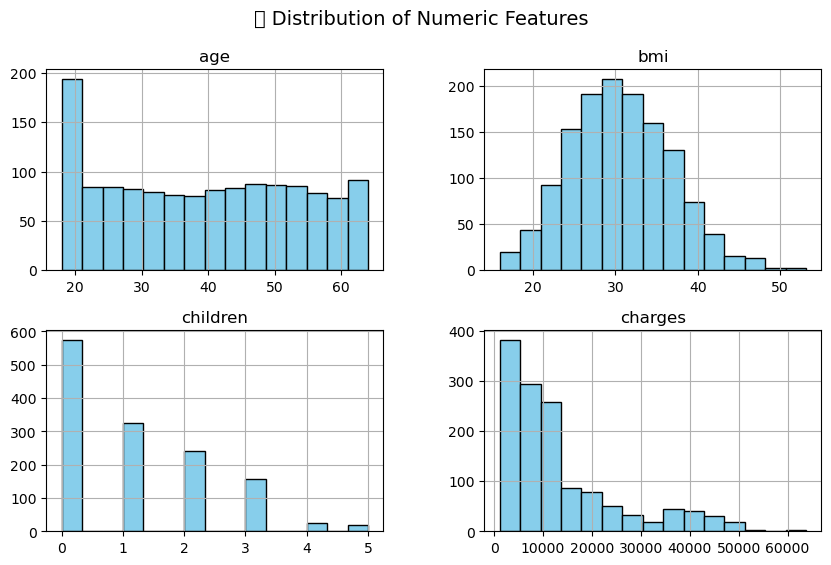

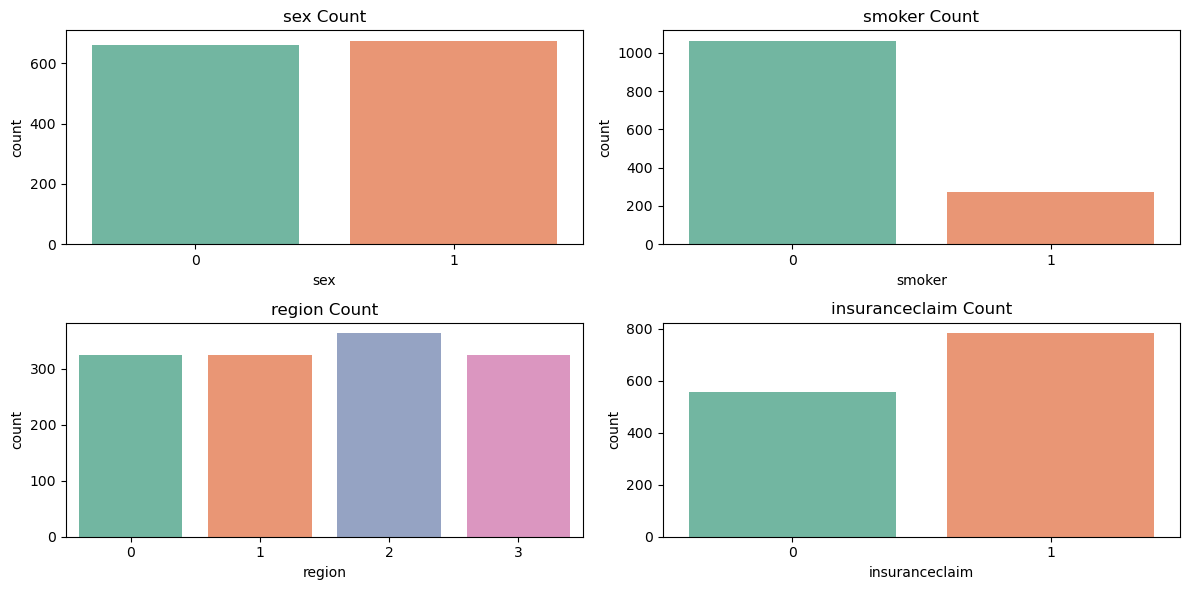

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


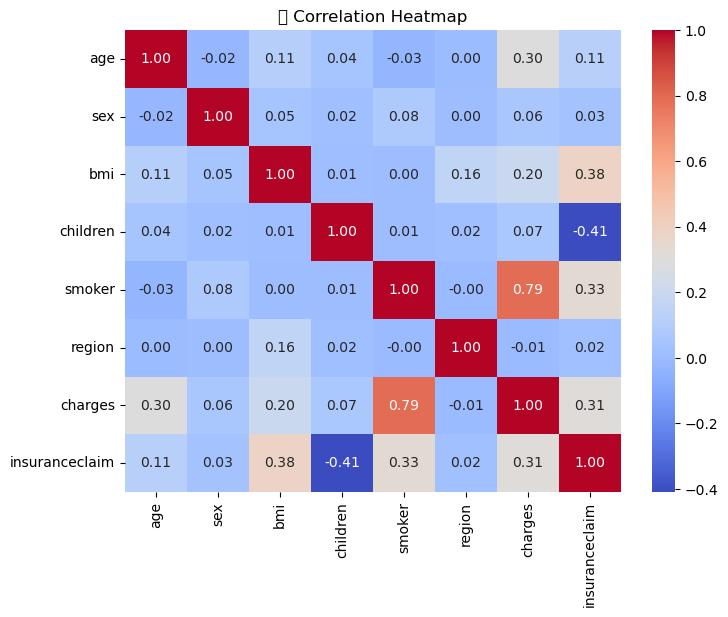

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


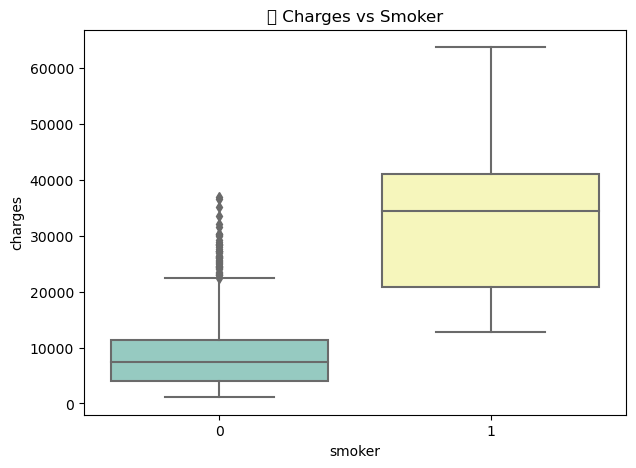


✅ After encoding and scaling:
        age       bmi  children  smoker   charges  sex_1  region_1  region_2  \
0 -1.438764 -0.453320 -0.908614       1  0.298584  False     False     False   
1 -1.509965  0.509621 -0.078767       0 -0.953689   True     False      True   
2 -0.797954  0.383307  1.580926       0 -0.728675   True     False      True   
3 -0.441948 -1.305531 -0.908614       0  0.719843   True      True     False   
4 -0.513149 -0.292556 -0.908614       0 -0.776802   True      True     False   

   region_3  
0      True  
1     False  
2     False  
3     False  
4     False  

📊 Train size: (1070, 9)
📊 Test size: (268, 9)

✅ Model Evaluation:
Accuracy: 0.9514925373134329

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       107
           1       0.97      0.94      0.96       161

    accuracy                           0.95       268
   macro avg       0.95      0.95      0.95       268
weighted a

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


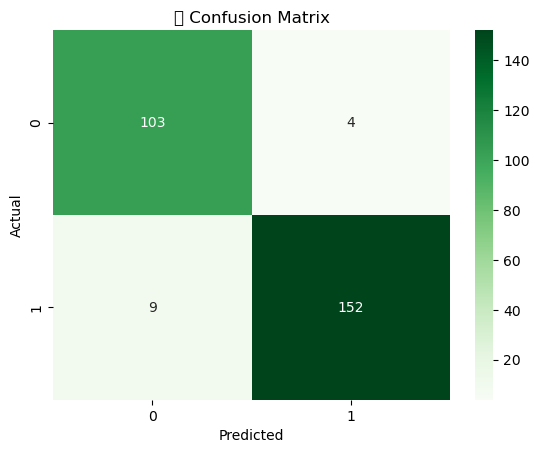


🧠 Demo Prediction on one sample:
Predicted Insurance Claim: 0
Actual Insurance Claim: 1


In [16]:
# ---------------------------------------------
# 📘 Neural Network Demo (Using scikit-learn MLP)
# ---------------------------------------------
# Goal: Predict 'insuranceclaim' using simple neural network
# ---------------------------------------------

# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

# ---------------------------------------------
# 2️⃣ Load dataset
# ---------------------------------------------
data = pd.read_csv("Insurance.csv")
print("✅ Dataset loaded successfully!\n")
print(data.head(), "\n")

# ---------------------------------------------
# 3️⃣ Basic information
# ---------------------------------------------
print("🔹 Info:")
print(data.info())
print("\n🔹 Missing values:\n", data.isnull().sum())
print("\n🔹 Summary statistics:\n", data.describe())

# ---------------------------------------------
# 4️⃣ Exploratory Data Analysis
# ---------------------------------------------
num_features = ['age', 'bmi', 'children', 'charges']
data[num_features].hist(bins=15, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("📊 Distribution of Numeric Features", fontsize=14)
plt.show()

cat_features = ['sex', 'smoker', 'region', 'insuranceclaim']
plt.figure(figsize=(12, 6))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f"{col} Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔥 Correlation Heatmap")
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(x='smoker', y='charges', data=data, palette="Set3")
plt.title("💰 Charges vs Smoker")
plt.show()

# ---------------------------------------------
# 5️⃣ Preprocessing
# ---------------------------------------------
X = data.drop('insuranceclaim', axis=1)
y = data['insuranceclaim']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['sex', 'region'], drop_first=True)

# Scale numerical columns
scaler = StandardScaler()
num_cols = ['age', 'bmi', 'children', 'charges']
X[num_cols] = scaler.fit_transform(X[num_cols])

print("\n✅ After encoding and scaling:")
print(X.head())

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n📊 Train size:", X_train.shape)
print("📊 Test size:", X_test.shape)

# ---------------------------------------------
# 6️⃣ Build the Neural Network
# ---------------------------------------------
mlp = MLPClassifier(hidden_layer_sizes=(16, 8),
                    activation='relu',
                    solver='adam',
                    max_iter=1000,
                    random_state=42)

# ---------------------------------------------
# 7️⃣ Train the Model
# ---------------------------------------------
mlp.fit(X_train, y_train)

# ---------------------------------------------
# 8️⃣ Evaluate the Model
# ---------------------------------------------
y_pred = mlp.predict(X_test)

print("\n✅ Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("🧩 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------------------------
# 9️⃣ Demo Prediction
# ---------------------------------------------
sample = X_test.iloc[[0]]
print("\n🧠 Demo Prediction on one sample:")
print("Predicted Insurance Claim:", mlp.predict(sample)[0])
print("Actual Insurance Claim:", y_test.iloc[0])


In [13]:
!pip uninstall tensorflow tensorflow-intel tensorflow-gpu -y
!pip install tensorflow-cpu


Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow-cpu from https://files.pythonhosted.org/packages/4e/44/4f57c30bc0c8913d90c36b110e6536a754a5e21074656d34556ca23c0cda/tensorflow_cpu-2.20.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB 660.6 kB/s eta 0:08:23
   ---------------------------------------- 0.0/331.8 MB 495.5 kB/s eta 0:11:10
   ---------------------------------------- 0.1/331.8 MB 585.1 kB/s eta 0:09:27
   ---------------------------------------- 0.2/331.8 MB 893.0 kB/s eta 0:06:12
   ---------------------------------------- 0.2/331.8 MB 1.0 MB/s eta 0:05:30
   ---------------------------------------- 0.3/331.8 MB 1.1 MB/s eta 0:04:56
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
